In [ ]:
#Exercise A.1: Preprocessing

import re
import string

filename = "Taylor_Swift_Quotes.txt"

def clean(text):
    text = text.lower()                                                 #Lowercase
    text = re.sub(r'\d+', " ", text)                                    #Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))    #Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()                            #Remove überflüssige Leerzeichen
    return text

with open(filename, "r", encoding="utf-8") as file:
    text = file.read()

cleaned_text = clean(text)

print(cleaned_text)

#store cleaned text in new file
# with open('cleaned_text.txt', 'w', encoding="utf-8") as file:
#    file.write(cleaned_text)


In [ ]:
#Exercise A.2: Tokenization

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

tokenized_text = nltk.word_tokenize(cleaned_text)
print(tokenized_text)

#store tokenized text in new file
# with open('tokenized_text.txt', 'w', encoding="utf-8") as file:
#    file.write(tokenized_text)


In [ ]:
#Exercise A.2: StopWords

from spacy.lang.en.stop_words import STOP_WORDS             #removes 'is'. 'the' etc

print(f"Number of Stopwords: {len(STOP_WORDS)}")
print(sorted(STOP_WORDS), "\n")

filtered_text = [word for word in tokenized_text if word.lower() not in STOP_WORDS]

print(filtered_text)

#store filtered text in new file
# with open('filtered_text.txt', 'w', encoding="utf-8") as file:
#    file.write(filtered_text)

In [ ]:
#Exercise A.3: Stemming and lemmatization

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

nltk.download('wordnet')        #db for lemmatizing
nltk.download('omw-1.4')

#Ohne das würde alles als Nomen behandelt -> PartOfSpeech Tagger wird sichergestellt
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    try:
        nltk.download('averaged_perceptron_tagger_eng')
    except:
        nltk.download('averaged_perceptron_tagger')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

#übersetzt die Wortarten (POS-Tags), die der NLTK-Tagger ausgibt, in ein Format, das der WordNet-Lemmatizer versteht.
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

stemmed_text = [stemmer.stem(word) for word in filtered_text]

pos_tags = nltk.pos_tag(filtered_text)  #bestimmt Wortart
lemmatized_text = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]


print(stemmed_text, "\n")
print(lemmatized_text)


In [ ]:
#Exercise A.4: Vocabulary

dictionary = lemmatized_text            #welchen Text sollte cih verwenden?

vocab_set = set(dictionary)

vocab_dict = {word: i for i, word in enumerate(sorted(vocab_set), start=1)} #sorted()=alphabetisch

print(f"Vocab size: {len(vocab_set)}")
for w in list(vocab_dict):
    print(w, '→', vocab_dict[w])


In [ ]:
#Exercise A.5: One-hot Encoding

import numpy as np

#np.set_printoptions(threshold=np.inf)  # disables truncation

oneHotEncoder = np.zeros((len(lemmatized_text), len(vocab_dict)), dtype=int)

for i, word in enumerate(lemmatized_text):
    if word in vocab_dict:
        index = vocab_dict[word] - 1
        oneHotEncoder[i, index] = 1

print(oneHotEncoder[:10]) #[:10] zeigt die ersten 10 Wörter an

love 20
like 8
guy 5
write 5
song 4
im 4
fairy 3
tale 3
he 3
bad 3
easy 3
thats 3
’ 3
plan 3
think 3
cant 3
people 3
fall 3
prince 2
charm 2
spot 2
wear 2
black 2
cape 2
realize 2
find 2
make 2
predict 2
idea 2
look 2
ive 2
come 2
there 2
feel 2
sparkle 2
complicate 2
right 2
sudden 2
person 2
stay 2
time 2
relationship 2
happy 2
little 1
girl 1
read 1
meet 1
want 1
know 1
grow 1
thought 1
funny 1
laugh 1
perfect 1
hair 1
suffer 1
girlnextdooritis 1
friend 1
ve 1
learn 1
t 1
obsessed 1
organization 1
exception 1
wild 1
card 1
high 1
school 1
sooooo 1
cool 1
awesome 1
car 1
matter 1
day 1
character 1
honesty 1
trust 1
adventure 1
misadventure 1
concern 1
tricky 1
business 1
wasnt 1
wouldnt 1
enthral 1
lately 1
wonderful 1
realization 1
fascinate 1
pattern 1
happen 1
course 1
itll 1
end 1
unpredictable 1
frustrate 1
tragic 1
beautiful 1
way 1
expert 1
worth 1
experience 1
life 1
have 1
word 1
real 1
lot 1
s 1
huge 1
thing 1
figured 1
rest 1
walk 1
daydream 1
great 1
simple 1
wrong 1
fear

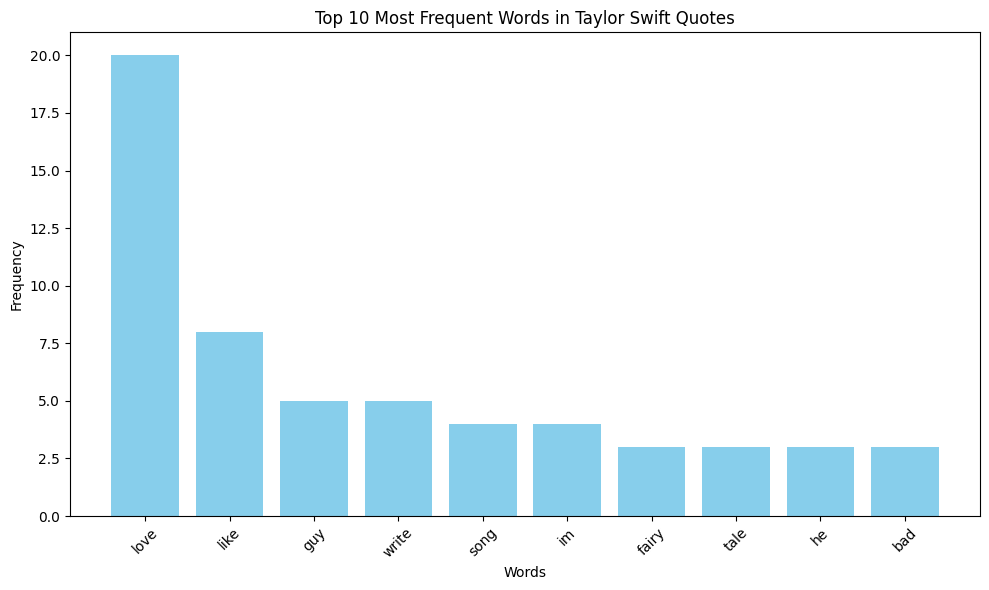

In [21]:
#Word Counter

import heapq
import matplotlib.pyplot as plt

wordCount = {}
for word in lemmatized_text:
    wordCount[word] = wordCount.get(word, 0) + 1

#filtered_word2count = {word: count for word, count in wordCount.items() if word not in STOP_WORDS}

sorted_wordCount = sorted(wordCount.items(), key=lambda x: x[1], reverse=True)

for word, count in sorted_wordCount:
    print(word, count)

    freq_words = heapq.nlargest(10, wordCount, key=wordCount.get)
print(f"Top 10 most frequent words: {freq_words[:10]}")

top_words = sorted(wordCount.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words in Taylor Swift Quotes')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [22]:
# Exercise A.6: Bag-of-Words

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


filename = "Taylor_Swift_Quotes.txt"
with open(filename, "r", encoding="utf-8") as f:
    text = f.read()

#Split the Quotes. q.strip removes empty lines and spaces
quotes = [q.strip() for q in text.split("\n") if q.strip()]

# builds BoW, every words becomes a feature
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

#TRansform
X = vectorizer.fit_transform(quotes)

#Convert to DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.insert(0, "Quote", quotes)

#print 1st rows
print(bow_df.head())




                                               Quote  able  adventures  \
0  When I was a little girl I used to read fairy ...     0           0   
1  I suffer from girl-next-door-itis where the gu...     0           0   
2  I’ve learned that you can’t predict [love] or ...     0           0   
3  In high school, I used to think it was like so...     0           0   
4  I write songs about my adventures and misadven...     0           1   

   awesome  bad  beautiful  beings  black  breaks  business  ...  wearing  \
0        0    3          0       0      2       0         0  ...        2   
1        0    0          0       0      0       0         0  ...        0   
2        0    0          0       0      0       0         0  ...        0   
3        1    0          0       0      0       0         0  ...        0   
4        0    0          1       0      0       0         1  ...        0   

   wild  won  wonderful  word  worth  wouldn  write  writing  wrong  
0     0    0          

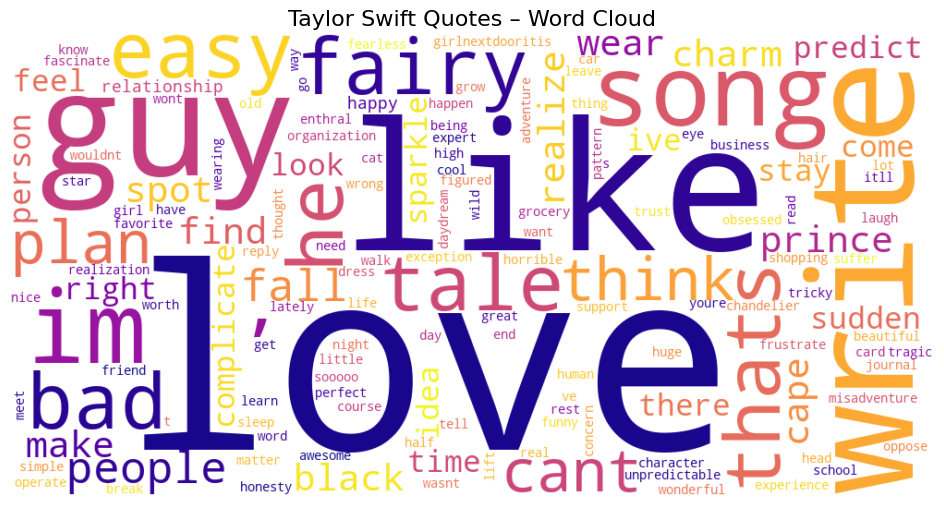

In [26]:
#WordCloud erstellen

from wordcloud import WordCloud

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='plasma',  # optional: schöne Farbpalette
    max_words=150        # nur häufigste 150 Wörter anzeigen
).generate_from_frequencies(wordCount)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Taylor Swift Quotes – Word Cloud", fontsize=16)
plt.show()

In [28]:
#Exercise A7: BAg-of-n-grams

from nltk import bigrams
from nltk import trigrams

bigram_list = list(bigrams(tokenized_text))

for bigram in bigram_list:
    print(bigram)

trigram_list = list(trigrams(tokenized_text))

for trigram in trigram_list:
    print(trigram)

('when', 'i')
('i', 'was')
('was', 'a')
('a', 'little')
('little', 'girl')
('girl', 'i')
('i', 'used')
('used', 'to')
('to', 'read')
('read', 'fairy')
('fairy', 'tales')
('tales', 'in')
('in', 'fairy')
('fairy', 'tales')
('tales', 'you')
('you', 'meet')
('meet', 'prince')
('prince', 'charming')
('charming', 'and')
('and', 'hes')
('hes', 'everything')
('everything', 'you')
('you', 'ever')
('ever', 'wanted')
('wanted', 'in')
('in', 'fairy')
('fairy', 'tales')
('tales', 'the')
('the', 'bad')
('bad', 'guy')
('guy', 'is')
('is', 'very')
('very', 'easy')
('easy', 'to')
('to', 'spot')
('spot', 'the')
('the', 'bad')
('bad', 'guy')
('guy', 'is')
('is', 'always')
('always', 'wearing')
('wearing', 'a')
('a', 'black')
('black', 'cape')
('cape', 'so')
('so', 'you')
('you', 'always')
('always', 'know')
('know', 'who')
('who', 'he')
('he', 'is')
('is', 'then')
('then', 'you')
('you', 'grow')
('grow', 'up')
('up', 'and')
('and', 'you')
('you', 'realize')
('realize', 'that')
('that', 'prince')
('prince

In [33]:

#Exercise A.8: TF-IDF
#je häöher der idf WErt, desto seltener kommt es vor

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
result = tfidf.fit_transform(quotes)

print('\nidf values:')
for word, idfScore in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(word, ':', idfScore)





idf values:
able : 3.1400661634962708
about : 2.4469189829363254
adventures : 3.1400661634962708
again : 3.1400661634962708
all : 2.4469189829363254
always : 3.1400661634962708
an : 2.734601055388106
and : 1.3483066942682158
anything : 3.1400661634962708
are : 3.1400661634962708
around : 3.1400661634962708
as : 2.734601055388106
at : 2.734601055388106
awesome : 3.1400661634962708
bad : 3.1400661634962708
be : 2.4469189829363254
beautiful : 3.1400661634962708
became : 3.1400661634962708
because : 2.2237754316221157
before : 3.1400661634962708
beings : 3.1400661634962708
black : 3.1400661634962708
breaks : 3.1400661634962708
business : 3.1400661634962708
but : 2.734601055388106
by : 3.1400661634962708
can : 2.2237754316221157
cape : 3.1400661634962708
car : 3.1400661634962708
card : 3.1400661634962708
cats : 3.1400661634962708
chandeliers : 3.1400661634962708
character : 3.1400661634962708
charming : 3.1400661634962708
come : 3.1400661634962708
comes : 3.1400661634962708
complicated : 3

In [35]:
#Top20 and Last 20

# Wörter und ihre IDF-Werte holen
words = tfidf.get_feature_names_out()
idf_values = tfidf.idf_

# Sortieren nach IDF-Wert (absteigend)
sorted_indices_descending = np.argsort(idf_values)[::-1]

print("\nTop 20 IDF-Score:")
for i in sorted_indices_descending[:20]:
    print(f"{words[i]} : {idf_values[i]:.3f}")

sorted_indices_ascending = np.argsort(idf_values)

print("\nLast 20 IDF-Score:")
for i in sorted_indices_ascending[:20]:
    print(f"{words[i]} : {idf_values[i]:.3f}")


Top 20 IDF-Score:
yourself : 3.140
wrong : 3.140
wonderful : 3.140
wouldn : 3.140
word : 3.140
worth : 3.140
won : 3.140
which : 3.140
why : 3.140
wild : 3.140
way : 3.140
wasn : 3.140
wanted : 3.140
while : 3.140
were : 3.140
this : 3.140
thought : 3.140
though : 3.140
trust : 3.140
tricky : 3.140

Last 20 IDF-Score:
to : 1.268
and : 1.348
that : 1.348
in : 1.348
you : 1.531
the : 1.636
love : 1.636
is : 1.887
it : 1.887
like : 1.887
with : 2.041
of : 2.224
me : 2.224
if : 2.224
can : 2.224
because : 2.224
so : 2.224
go : 2.447
we : 2.447
one : 2.447
